# Rainfall Prediction - Weather Forecasting

# Problem Statement:



Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [2]:
df=pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Getting the basic outline of the dataset

In [4]:
df.shape

(8425, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

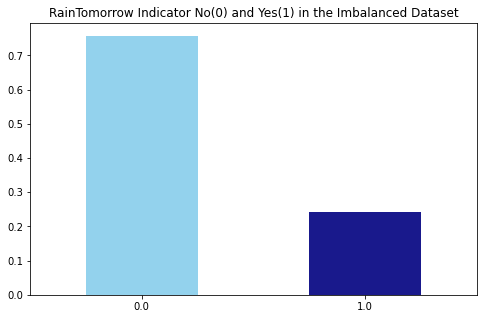

In [7]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

Observations:
    
    1.We see that the presence of “0” and “1” is almost in the 78:22 ratio. So there is a class imbalance and we have to deal with it.
    
2.To handle class imbalance,we use oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much difference here.

In [8]:
from sklearn.utils import resample

In [9]:
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

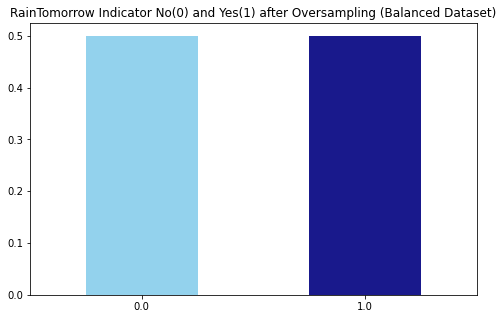

In [10]:
fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

Checking for missing data model in the dataset and plotting heatmap

In [11]:
import seaborn as sns

<AxesSubplot:>

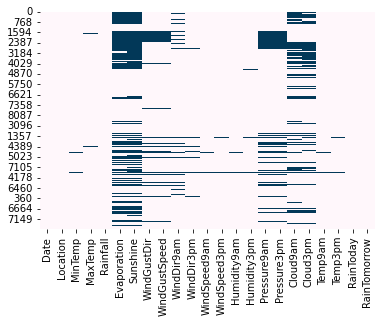

In [12]:
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

Observations:
    
    1.“Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing percentage.

In [13]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,5886,0.475061
Evaporation,5186,0.418563
Cloud9am,3202,0.258434
Cloud3pm,3197,0.258031


Observations:

1.We see that 4 features have less than 50 per cent missing data.
2.So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

In [14]:
#Imputing categorical columns with mode, and then we will use the label encoder to convert them to numeric numbers 
#Then we will detect outliers using the interquartile range and remove them to get the final working dataset.
#Checking the correlation between the different variables, and if we find a pair of highly correlated variables, 

In [15]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [16]:
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

import warnings
warnings.filterwarnings("ignore")

C:\Users\Swetha\AppData\Roaming\Python\Python39\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Observation:
    
    1.Our dataset has no “NaN” value. We will now detect and eliminate outliers from the inter-quartile interval-based data set.

Detecting outliers with IQR

In [20]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1431.750000
Location            5.000000
MinTemp             8.300000
MaxTemp             8.400000
Rainfall            3.200000
Evaporation         4.238617
Sunshine            6.344000
WindGustDir         9.000000
WindGustSpeed      20.000000
WindDir9am          9.000000
WindDir3pm          7.000000
WindSpeed9am       13.000000
WindSpeed3pm       15.000000
Humidity9am        24.000000
Humidity3pm        27.123541
Pressure9am         8.200000
Pressure3pm         8.000000
Cloud9am            4.068659
Cloud3pm            4.000000
Temp9am             8.000000
Temp3pm             8.075000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


Removing outliers from the dataset

In [21]:
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(9748, 23)

Correlation Heatmap

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

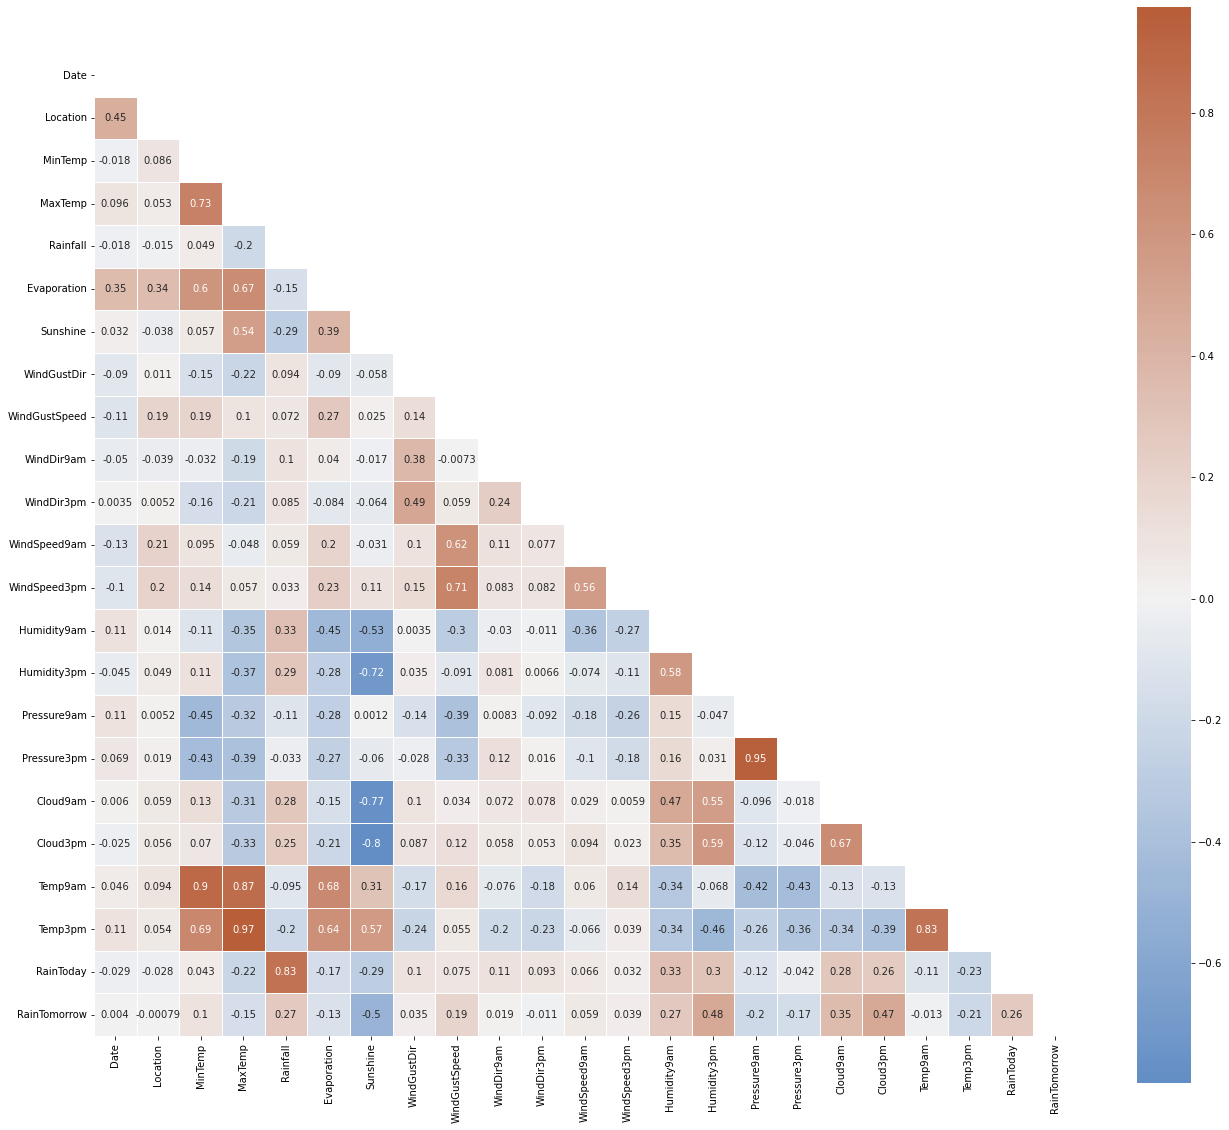

In [23]:
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

Observations:
    
    1.MaxTemp and MinTemp, Pressure9am and pressure3pm, Temp9am and Temp3pm, Evaporation and MaxTemp, MaxTemp and Temp3pm have a strong correlation with each other

In [25]:
# Standardizing data
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


Observations:
    
    1.We can observe that “Sunshine”, “Humidity9am”, “Humidity3pm”, “Pressure9am”, “Pressure3pm” have higher importance compared to other features.

selection by random forest

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

In [29]:
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Date', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm']
[0.04552285 0.02167373 0.03696247 0.03299921 0.02891997 0.0351255
 0.1177546  0.02179026 0.05071181 0.02497631 0.0259351  0.02587539
 0.02833827 0.04441683 0.11580411 0.04671925 0.05793059 0.04206377
 0.10439172 0.03533102 0.03867535 0.0180819 ]


Training Rainfall Prediction Model with Different Models

#Dividing the  dataset into training (75%) and test (25%) sets respectively to train the rainfall prediction model. 
#For best results, we will standardize our X_train and X_test data:

In [30]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

In [31]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [32]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [34]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

In [35]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7825194911776775
ROC Area under Curve = 0.7770931872873621
Cohen's Kappa = 0.5578440649001561
Time taken = 0.3090977668762207
              precision    recall  f1-score   support

         0.0    0.78506   0.83196   0.80783      1339
         1.0    0.77898   0.72222   0.74953      1098

    accuracy                        0.78252      2437
   macro avg    0.78202   0.77709   0.77868      2437
weighted avg    0.78232   0.78252   0.78156      2437



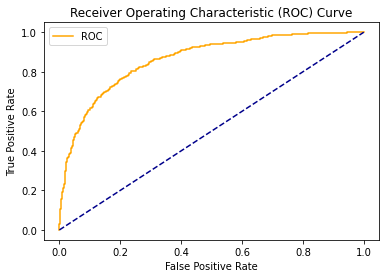

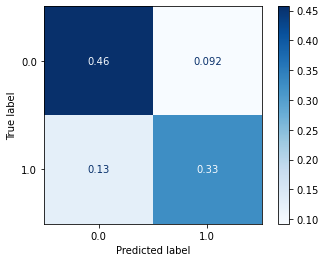

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Observations:
    
    1.the accuracy f1 score as 0.78252  

Accuracy = 0.885514977431268
ROC Area under Curve = 0.8859005646766271
Cohen's Kappa = 0.7694676914762214
Time taken = 0.06699752807617188
              precision    recall  f1-score   support

         0.0    0.90707   0.88200   0.89436      1339
         1.0    0.86079   0.88980   0.87506      1098

    accuracy                        0.88551      2437
   macro avg    0.88393   0.88590   0.88471      2437
weighted avg    0.88622   0.88551   0.88566      2437



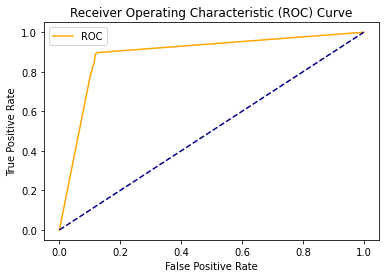

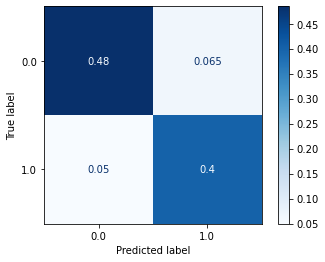

In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Observations:
    
    1.the accuracy f1 score as 0.88346

Accuracy = 0.9626590069757899
ROC Area under Curve = 0.9633966843102607
Cohen's Kappa = 0.9247469672892423
Time taken = 2.448404312133789
              precision    recall  f1-score   support

         0.0    0.97561   0.95594   0.96567      1339
         1.0    0.94756   0.97086   0.95906      1098

    accuracy                        0.96266      2437
   macro avg    0.96158   0.96340   0.96237      2437
weighted avg    0.96297   0.96266   0.96270      2437



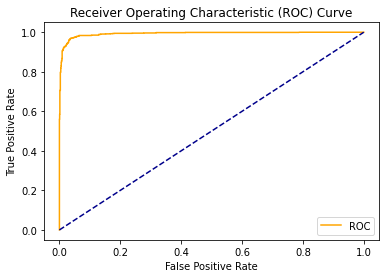

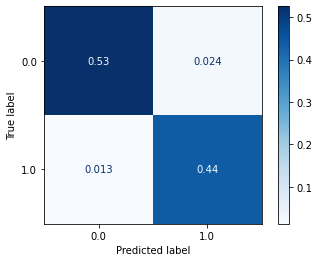

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Observations:
    
    1.the accuracy f1 score as 0.96266 

Accuracy = 0.9610176446450553
ROC Area under Curve = 0.961821071919751
Cohen's Kappa = 0.9214519889001718
Time taken = 159.1794295310974
              precision    recall  f1-score   support

         0.0    0.97481   0.95370   0.96414      1339
         1.0    0.94499   0.96995   0.95730      1098

    accuracy                        0.96102      2437
   macro avg    0.95990   0.96182   0.96072      2437
weighted avg    0.96137   0.96102   0.96106      2437



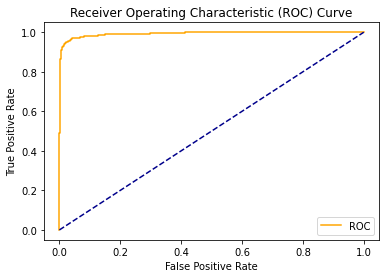

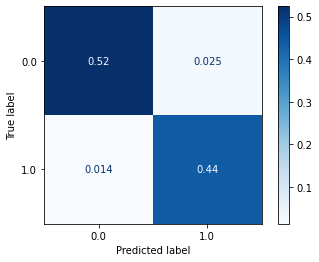

In [39]:
# Catboost
!pip install catboost
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

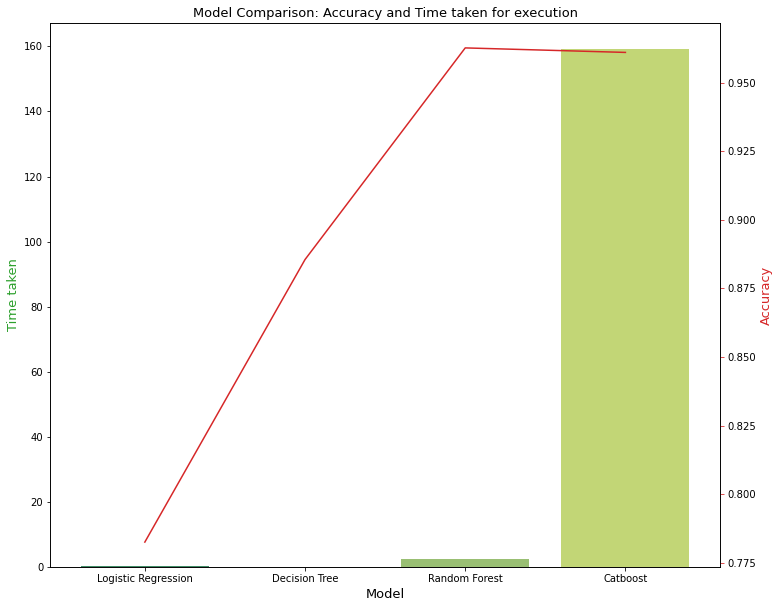

In [49]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_cb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_cb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_cb]
tt = [tt_lr, tt_dt, tt_rf, tt_cb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','Catboost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

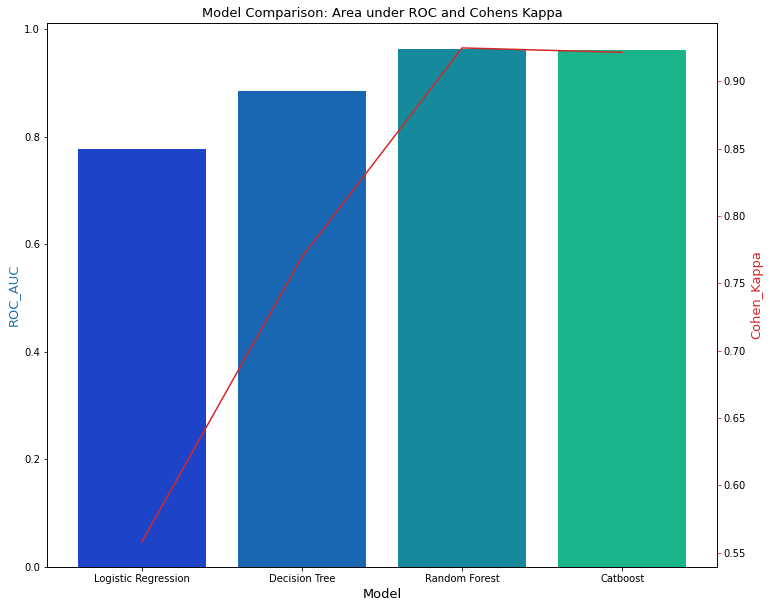

In [50]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

Observations:
    
    1.We can observe that CatBoost and Random Forest performed better compared to other models. However, if speed is an important thing to consider, we can stick with Random Forest instead of CatBoost.